# Multi-Label Classification

In [36]:
import os
import pandas as pd
from pandas.plotting import autocorrelation_plot
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score

In [6]:
df = pd.read_csv('C:\Repos\DS-3FeaturesClassification\df_data.csv')
df['_target'] = df['target']
df = pd.get_dummies(df,columns=['target'],prefix = ['target'])

x = np.dstack( ( 
                 np.array(df['x1']), 
                 np.array(df['x2']), 
                 np.array(df['x3']) 
                 ) 
             )

y = np.dstack( ( 
                 np.array(df['target_low']),
                 np.array(df['target_med']),
                 np.array(df['target_high']) 
                ) 
             )

In [9]:
print(x.shape)
print(y.shape)

(1, 10000, 3)
(1, 10000, 3)


In [10]:
x = x[0,:,:]
y = y[0,:,:]

In [11]:
df

x1     x2     x3 _target  target_high  target_low  target_med
0      2.71  10.39 -36.45     med            0           0           1
1      9.88   5.76 -54.63     med            0           0           1
2     82.87   1.73   0.83     med            0           0           1
3     12.99  10.40 -59.60     med            0           0           1
4     60.10   8.84 -45.87     med            0           0           1
...     ...    ...    ...     ...          ...         ...         ...
9995  65.03  13.47 -28.30    high            1           0           0
9996  62.24   7.42 -50.47    high            1           0           0
9997  45.37   3.68 -33.13    high            1           0           0
9998  -1.97   6.07 -28.04    high            1           0           0
9999  49.80  12.34   6.84    high            1           0           0

[10000 rows x 7 columns]

In [18]:
df_low = df.loc[df['_target'] == 'low']

df_med = df.loc[df['_target'] == 'med']

df_high = df.loc[df['_target'] == 'high']

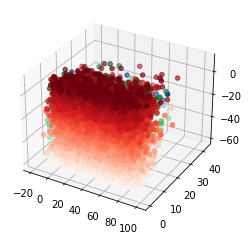

In [19]:
ax = plt.axes(projection='3d')

x_low = df_low['x1']
y_low = df_low['x2']
z_low = df_low['x3']
ax.scatter3D(x_low, y_low, z_low, c=z_low, cmap='Reds');

x_med = df_med['x1']
y_med = df_med['x2']
z_med = df_med['x3']
ax.scatter3D(x_med, y_med, z_med, c=z_med, cmap='Blues');

x_high = df_high['x1']
y_high = df_high['x2']
z_high = df_high['x3']
ax.scatter3D(x_high, y_high, z_high, c=z_high, cmap='Greens');

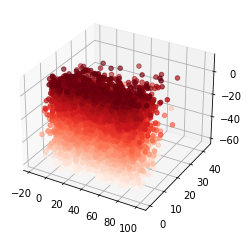

In [21]:
ax = plt.axes(projection='3d')
x_low = df_low['x1']
y_low = df_low['x2']
z_low = df_low['x3']
ax.scatter3D(x_low, y_low, z_low, c=z_low, cmap='Reds');

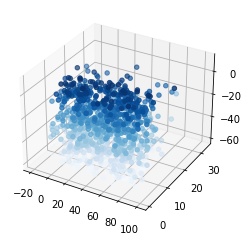

In [22]:
ax = plt.axes(projection='3d')
x_med = df_med['x1']
y_med = df_med['x2']
z_med = df_med['x3']
ax.scatter3D(x_med, y_med, z_med, c=z_med, cmap='Blues');

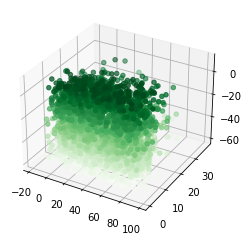

In [23]:
ax = plt.axes(projection='3d')
x_high = df_high['x1']
y_high = df_high['x2']
z_high = df_high['x3']
ax.scatter3D(x_high, y_high, z_high, c=z_high, cmap='Greens');

In [24]:
df['target_low'].value_counts(normalize=True)

1    0.6
0    0.4
Name: target_low, dtype: float64

In [25]:
df['target_med'].value_counts(normalize=True)

0    0.9
1    0.1
Name: target_med, dtype: float64

In [26]:
df['target_low'].value_counts(normalize=True)

1    0.6
0    0.4
Name: target_low, dtype: float64

In [28]:
arr_dict = {0:"low", 1:"med", 2:"high"}
def arr2class(_arr):
    return arr_dict[np.argmax(_arr)]

# Escalando dados para deep learning

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y)
true_arr = []
for arr in y_test:
    true_arr.append(arr2class(arr))

df_pred = pd.DataFrame()
df_pred['true'] = true_arr

## Função de ativação e otimizador.

Função de ativação 

Como convertemos os valores negativos em escalas individuais de 0 a 1 para cada feature x1,x2,x3 podemos utilizar melhor as funções de ativação compatíveis com tais valores, no caso a ReLu é apropriada para o seleção de features visto que sua derivada produz uma função degrau que irá desativar ou ativar features para cada label.

### Funções de ativação:
[<img src="https://4.bp.blogspot.com/-4puZ_ZMyoLE/WPk_rwqhKnI/AAAAAAAAAjU/vrNE_Uv54yMLOd_3E83PvgpByf019ufZwCLcB/s400/ActivationFunctions.png">]

[<img src="https://1.bp.blogspot.com/-eT7Sq-cmXSQ/WPk_r6agDnI/AAAAAAAAAjY/uWakDV5UBSw_5L0Sw53XLnogv2ExNOQRwCEw/s400/ActivationFunctionDerivatives.png">]

Otimizador para o treino backpropagation será escolhido Adam, que em comparação a outros otimizadores de reajuste de gradiente, é o que converge mais rápido!

[<img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/05/Comparison-of-Adam-to-Other-Optimization-Algorithms-Training-a-Multilayer-Perceptron.png">]


Fonte: Machine Learning Mastery
https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

## Modelagem da rede.  
Podemos modelar inicialmente a rede neural com 9 neuronios na entrada, inferindo que cada 1 das 3 saídas é uma combinação específica de 3 features x1,x2,x3 da entrada. A saída será de 3 neuronios pois teremos uma classificação binária de 3 labels high(1,0,0), low(0,1,0), med(0,0,1)


In [103]:
current_model = 'mlp1'
mlp1 = Sequential()
mlp1.add(Dense(9, input_dim=3, kernel_initializer='he_uniform', activation='tanh')) #tanh para admitir entrada de valores negativos
mlp1.add(Dense(3, activation='relu')) # saida com função degrau
mlp1.compile(loss='binary_crossentropy', optimizer='adam')
mlp1.save_weights(current_model + "_wheigts_initial.h5")

history1 = mlp1.fit(x_train, y_train, verbose=0, epochs=9)
results1 = mlp1.predict(x_test)

test_arr = []
for arr in results1:
    test_arr.append(arr2class(arr))
df_pred['mlp1_predicted_class'] = test_arr
df_pred['mlp1_score'] = np.where(df_pred["true"] == df_pred["mlp1_predicted_class"], True, False)
df_pred['mlp1_score'].describe()

count     2500
unique       2
top       True
freq      1457
Name: mlp1_score, dtype: object

## NOVO SPLIT DO CONJUNTO EM (TREINO / VALIDAÇÃO) E TESTE, SCALA DOS VALORES PARA 0/1 E FUNÇÃO RELU NA ENTRADA

In [43]:
def plot_history(history, start_epoch=0):
    start_epoch = 10
    plt.figure(figsize=(10,4))
    plt.title('História Treino')
    plt.plot(history.history['loss'][start_epoch:], label='Train Loss')
    plt.plot(history.history['val_loss'][start_epoch:], label='Validation Loss')
    plt.legend()

In [30]:
x_train_2, x_val, y_train_2, y_val = train_test_split(x_train, y_train)

In [38]:
x_train_2_scaler = MinMaxScaler([0,1]).fit(x_train_2.reshape(-1,1))
x_val_scaler = MinMaxScaler([0,1]).fit(x_val.reshape(-1,1))

In [39]:
x_train_2_scaled = x_train_2_scaler.transform(x_train_2)
x_val_scaled = x_val_scaler.transform(x_val)

In [45]:
current_model = 'mlp2'
mlp2 = Sequential()
mlp2.add(Dense(9, input_dim=3, kernel_initializer='he_uniform', activation='relu')) #tanh para admitir entrada de valores negativos
mlp2.add(Dense(3, activation='relu')) # saida com função degrau
mlp2.compile(loss='binary_crossentropy', optimizer='adam')
mlp2.save_weights(current_model + "_wheigts_initial.h5")

(5625, 3) (5625, 3)
Restoring model weights from the end of the best epoch.
Epoch 00064: early stopping
INFO:tensorflow:Assets written to: mlp2_trained\assets


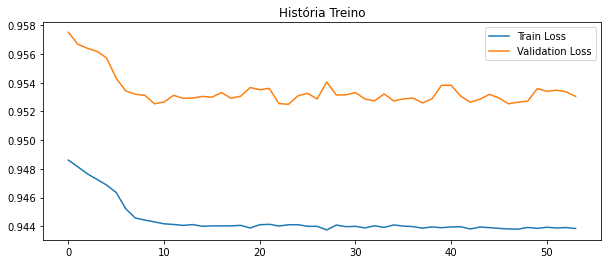

In [47]:
print(x_train_2_scaled.shape, y_train_2.shape)

# train
n_epochs = 100
# parada antecipada
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, 
                   patience = 30, restore_best_weights=True)

history2 = mlp2.fit(
            x_train_2_scaled,
            y_train_2,
            epochs = n_epochs, 
            verbose = 1,
            validation_data = (x_val_scaled , y_val),
            callbacks=[es])

plot_history(history2)
mlp2.save('mlp2_trained')

## Para utilizar a MLP2 teremos que escalar o vetor x_test

In [54]:
x_test_scaler = MinMaxScaler([0,1]).fit(x_test.reshape(-1,1))
x_test_scaled = x_test_scaler.transform(x_test)
x_test_scaled

array([[0.86046365, 0.43117933, 0.40250142],
       [0.59042385, 0.41450319, 0.15577032],
       [0.48405028, 0.45006633, 0.33074348],
       ...,
       [0.82900638, 0.42473628, 0.27856737],
       [0.40900764, 0.43395869, 0.35203083],
       [0.94289685, 0.48550313, 0.34975681]])

In [56]:
results_mlp2 = mlp1.predict(x_test_scaled)
results_mlp2

array([[0.36375463, 0.22891437, 0.67513865],
       [0.2526784 , 0.19955194, 0.53333384],
       [0.03021828, 0.23778287, 0.475385  ],
       ...,
       [0.4076537 , 0.21288669, 0.6645062 ],
       [0.        , 0.23413564, 0.42250285],
       [0.44352633, 0.24689716, 0.7541945 ]], dtype=float32)

In [57]:
test_arr = []
for arr in results_mlp2:
    test_arr.append(arr2class(arr))
df_pred['mlp2_predicted_class'] = test_arr
df_pred['mlp2_score'] = np.where(df_pred["true"] == df_pred["mlp2_predicted_class"], True, False)
df_pred['mlp2_score'].describe()

count      2500
unique        2
top       False
freq       1774
Name: mlp2_score, dtype: object

### MLP2 se saiu pior do que MLP1

# KNN

Para este problema podemos utilizar o algoritmo popular KNN(K — Nearest Neighbors), pois é um algoritmo de treino supervisionado (e este problema temos o valor supervisionado y = "target" para cada entrada de treinamento)

E as entradas de treino possuem valores quantitativos que podem ser interpretados como distancias euclidianas no espaço entre as features até o valor supervisionado.

No exemplo abaixo, as features x1,x2,x3 poderiam ser intepretadas como Wheelbase, price in thousands e horsepower.


[<img src="https://www.ibm.com/support/knowledgecenter/bs/SSLVMB_24.0.0/spss/images/images_m-r/model_knn_feature_space_cars_02.jpg">]


Fonte: IBM Knowledge Center, Nearest Neighbors Analysis, Using Nearest Neighbor Analysis to Assess New Vehicle Offerings
link: https://www.ibm.com/support/knowledgecenter/bs/SSLVMB_24.0.0/components/knn/knn_carsales_check-type_modelviewer_feature-space.html



In [91]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_train)
results2 = knn_clf.predict(x_test)

test_arr = []
for arr in results2:
    test_arr.append(arr2class(arr))
df_pred['knn_predicted_class'] = test_arr
df_pred['knn_score'] = np.where(df_pred["true"] == df_pred["knn_predicted_class"], True, False)
df_pred['knn_score'].describe()

count     2500
unique       2
top       True
freq      1379
Name: knn_score, dtype: object

# COMPARANDO

In [109]:
print("\n\n     MLP \n\n", df_pred['mlp1_score'].value_counts(normalize=True))
print("\n\n     KNN \n\n", df_pred['knn_score'].value_counts(normalize=True))



     MLP 

 True     0.5828
False    0.4172
Name: mlp1_score, dtype: float64


     KNN 

 True     0.5516
False    0.4484
Name: knn_score, dtype: float64


# MELHOR REDE NEURAL ACERTOU 58,28% E KNN 55,16%

Entre os métodos escolhidos KNN e Deep Learning com redes perceptron tiveram resultados muitos próximos e convergindo à uma rápida memorização de aprendizado para a população + presente de labels, "low" que contemplam 60% do conjunto total de dados.